# <span style = "color :blue; font-weight: Bold;">ANALYSIS OF EMPLOYEE RETENTION FOR HR DEPARTMENT OF A COMPANY</span>

In [103]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
%matplotlib inline

In [105]:
df = pd.read_csv(r'HR_comma_sep.csv')
df.head(10)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
5,0.41,0.50,2,153,3,0,1,0,sales,low
6,0.10,0.77,6,247,4,0,1,0,sales,low
7,0.92,0.85,5,259,5,0,1,0,sales,low
8,0.89,1.00,5,224,5,0,1,0,sales,low
9,0.42,0.53,2,142,3,0,1,0,sales,low


In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


###  <span style = "color :red; font-weight: Bold;">Bar Chart for Impact of Salary on employee retention</span>

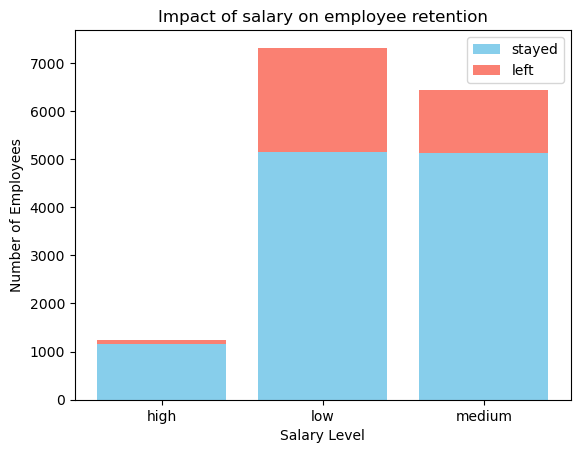

In [175]:
salary_retention = df.groupby(['salary','left']).size().unstack()
plt.bar(salary_retention.index, salary_retention[0], color = ['skyblue'], label = 'stayed')
plt.bar(salary_retention.index, salary_retention[1],bottom = salary_retention[0], color = ['salmon'], label = 'left')

plt.title('Impact of salary on employee retention')
plt.xlabel('Salary Level')
plt.ylabel('Number of Employees')

plt.legend(loc = 'best')
plt.show()

### <span style = "color :red; font-weight: Bold;">Correlation between Factors and Employees left because of that</span>

In [109]:
df.corr(numeric_only=True)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433
Work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245
left,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788
promotion_last_5years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000


In [111]:
print(df.corr(numeric_only=True)['left'].sort_values(ascending=False))

left                     1.000000
time_spend_company       0.144822
average_montly_hours     0.071287
number_project           0.023787
last_evaluation          0.006567
promotion_last_5years   -0.061788
Work_accident           -0.154622
satisfaction_level      -0.388375
Name: left, dtype: float64


### <span style = "color :red; font-weight: Bold;">Bar Chart for Correlation between Factors and Employees left because of that</span>

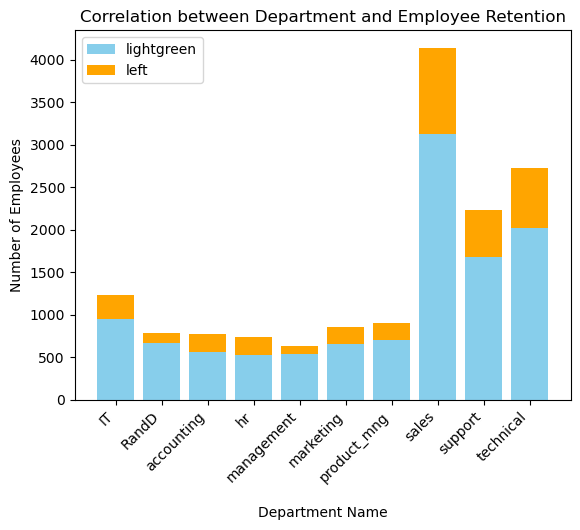

In [192]:
salary_retention = df.groupby(['Department','left']).size().unstack()
plt.bar(salary_retention.index, salary_retention[0], color = ['skyblue'], label = 'lightgreen')
plt.bar(salary_retention.index, salary_retention[1],bottom = salary_retention[0], color = ['orange'], label = 'left')

plt.title('Correlation between Department and Employee Retention')
plt.xlabel('Department Name', labelpad = 15)
plt.ylabel('Number of Employees')

plt.legend(loc = 'best')
plt.xticks(rotation=45, ha='right')
plt.show()

### <span style = "color :red; font-weight: Bold;">Transforming the Data to Scale and Fit</span>

In [113]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [115]:
X_scaled = df[['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company', 'Work_accident']]
X_scaled.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident
0,0.38,0.53,2,157,3,0
1,0.80,0.86,5,262,6,0
2,0.11,0.88,7,272,4,0
3,0.72,0.87,5,223,5,0
4,0.37,0.52,2,159,3,0


In [117]:
y = df['left']
y.head(10)

0    1
1    1
2    1
3    1
4    1
5    1
6    1
7    1
8    1
9    1
Name: left, dtype: int64

### <span style = "color :red; font-weight: Bold;">Splitting Dataset to test the Accuracy of the Model</span>

In [119]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled,y, test_size = 0.2,random_state = 42)

In [121]:
X_test

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident
6723,0.65,0.96,5,226,2,1
6473,0.88,0.80,3,166,2,0
4679,0.69,0.98,3,214,2,0
862,0.41,0.47,2,154,3,0
7286,0.87,0.76,5,254,2,1
...,...,...,...,...,...,...
3297,0.61,0.74,2,143,6,0
14113,0.93,0.89,3,255,7,1
5514,0.78,0.61,3,193,3,0
9939,0.89,0.76,2,278,2,0


In [149]:
len(X_train)

11999

In [151]:
X_train.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident
9838,1.00,0.61,3,188,4,0
7689,0.16,0.78,4,196,5,0
6557,0.80,0.80,3,175,2,0
6872,0.66,0.86,4,112,6,0
820,0.11,0.93,7,284,4,0


### <span style = "color :red; font-weight: Bold;">Training the Dataset for predictions</span>

In [153]:
model = LogisticRegression(solver = 'saga', class_weight = 'balanced', tol = 1e-4,max_iter = 12000 )

In [155]:
model.fit(X_train,y_train)

LogisticRegression(class_weight='balanced', max_iter=12000, solver='saga')

### <span style = "color :red; font-weight: Bold;">Making Predictions</span>

In [157]:
model.predict(X_test)

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

### <span style = "color :red; font-weight: Bold;">Testing the Accuracy of the Model</span>

In [159]:
model.score(X_test,y_test)

0.758